# Implementation of Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
#Objective Function
def func(x,lmbda):
    O = np.ones([len(x),1])
    X = np.concatenate((O,x),axis=1)
    z = np.sum(X*lmbda,axis=1)
    return z    

#Sigmoid function
def sigmoid(z):
    sig = np.zeros(len(z))
    e = 2.718
    sig = 1/(1+e**(-z))
    return sig

In [3]:
#Loss Calculator
def loss_func(y,f):
    l=0
    for i in range(len(f)):
        p = f[i]
        if y[i] == 1:
            l = l + math.log(p)
        else:
            l = l + math.log(1-p)   
    return -l

In [4]:
#Gradient descent
def gradient_descent(x,y,f,lmbda):
    gd=np.zeros(len(lmbda))
    O = np.ones([len(x),1])
    X = np.concatenate((O,x),axis=1)
    c = (y -(1-y)) /((y*f)+(1-y)*(1-f))
    deltaf = f*(1-f)
    gf = -(c*deltaf)
    gd = np.sum(X.T*gf.T,axis=1)
    return gd

In [5]:
#Function for Logistic Regression
def logistic_regression(X_train,y_train,epoch,lr):
    d=np.shape(X_train)[1]
    lmbda = np.random.uniform(-0.7,0.7,d+1)
    #Uncomment below line and include weights of choice and comment above two lines to stop random generation
    #lmbda = np.array([ 0.15186064,  0.19682533, -0.63552302, -0.20966892,  0.00612083,  0.53645851])
    print("Initial weights:",lmbda)
    for i in range(epoch):
        z = func(X_train,lmbda)
        sig = sigmoid(z)
        loss = loss_func(y_train,sig)
        gd = gradient_descent(X_train,y_train,sig,lmbda)
        lmbda = lmbda - lr*gd
    print("Final Weights:",lmbda)
    return lmbda,loss
    

In [6]:
#Error Rate Calculator
def error_rate(x,y,lmbda):
    z = func(x,lmbda)
    sig = sigmoid(z)
    pred = np.where(sig >= 0.5,1,0)
    err = np.mean(pred != y)
    return err
    

# Auto Dataset loading and Preprocessing

In [7]:
#Loading Data
auto = pd.read_csv("auto.csv")
#Marking datapoints with garbage value as NaN
auto = auto[auto != '?']
#Dropping rows with Missing data
auto = auto.dropna()

In [8]:
#Adding new field to factorize the mpg attribute
auto['high'] = np.where(auto['mpg']>22, 1, 0)

In [9]:
#Checking Unique values of Categorical Variable origin
auto['origin'].unique()

array([1, 3, 2], dtype=int64)

In [10]:
#Adding dummy variables to represent categorical variable origin
auto['origina'] = np.where(auto['origin']==1,0,0)
auto['origina'] = np.where(auto['origin']==2,1,0)
auto['originb'] = np.where(auto['origin']==3,1,0)

In [11]:
#Subseting required set of attrobutes for analysis
df_data = auto[["horsepower", "weight", "year", "origina", "originb", "high"]]
df_data = df_data.astype({"horsepower": float,"weight": float,"year": float})
df_data

,horsepower,weight,year,origina,originb,high
0,130.0,3504.0,70.0,0,0,0
1,165.0,3693.0,70.0,0,0,0
2,150.0,3436.0,70.0,0,0,0
3,150.0,3433.0,70.0,0,0,0
4,140.0,3449.0,70.0,0,0,0
...,...,...,...,...,...,...
393,86.0,2790.0,82.0,0,0,1
394,52.0,2130.0,82.0,1,0,1
395,84.0,2295.0,82.0,0,0,1
396,79.0,2625.0,82.0,0,0,1


In [12]:
#Summary Statistics of Data
df_data.describe()

,horsepower,weight,year,origina,originb,high
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,104.469388,2977.584184,75.979592,0.173469,0.201531,0.507653
std,38.491160,849.402560,3.683737,0.379136,0.401656,0.500580
min,46.000000,1613.000000,70.000000,0.000000,0.000000,0.000000
25%,75.000000,2225.250000,73.000000,0.000000,0.000000,0.000000
50%,93.500000,2803.500000,76.000000,0.000000,0.000000,1.000000
75%,126.000000,3614.750000,79.000000,0.000000,0.000000,1.000000
max,230.000000,5140.000000,82.000000,1.000000,1.000000,1.000000


In [13]:
#Converting from Dataframe to numpy array
data = df_data.to_numpy()

# Normalizing the Columns with high magnitude

In [14]:
for i in 0,1,2:
    mean = np.mean(data[:,i])
    sd = np.std(data[:,i])
    data[:,i] = (data[:,i]-mean)/sd

In [15]:
data

array([[ 0.66413273,  0.62054034, -1.62531533,  0.        ,  0.        ,
         0.        ],
       [ 1.57459447,  0.84333403, -1.62531533,  0.        ,  0.        ,
         0.        ],
       [ 1.18439658,  0.54038176, -1.62531533,  0.        ,  0.        ,
         0.        ],
       ...,
       [-0.53247413, -0.80463202,  1.63640964,  0.        ,  0.        ,
         1.        ],
       [-0.66254009, -0.41562716,  1.63640964,  0.        ,  0.        ,
         1.        ],
       [-0.58450051, -0.30364091,  1.63640964,  0.        ,  0.        ,
         1.        ]])

# Spliting Data to test and training sets equally with random state

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data[:,0:5],data[:,5],train_size=0.5,random_state=100)

# Applying Logistic Regression

In [17]:
#Specifying Epochs and Learning Rate
epoch = 100
lr = 0.001

result = logistic_regression(X_train,y_train,epoch,lr)

Initial weights: [-0.08205728  0.21211087 -0.67212825  0.27365797 -0.23224848 -0.35624878]
Final Weights: [-0.22327948 -1.00107126 -2.0074284   0.86679331 -0.08238007 -0.1166402 ]


# Analysis of change in ERR due to change in Epoch for fixed Learning Rate

In [18]:
#Recording change in ERR for change in Epoch for fixed learing Rate
lr = 0.001
epoch = 50
err_mat = np.zeros([epoch,3])
for i in np.arange(0, epoch ):
    result = logistic_regression(X_train,y_train,(i+1),lr)
    train_err = error_rate(X_train,y_train,result[0]) 
    test_err = error_rate(X_test,y_test,result[0])
    err_mat[i][0] = result[1]
    err_mat[i][1] = train_err
    err_mat[i][2] = test_err
    print("Epoch:",(i+1)," Loss:",result[1]," Training ER:",train_err," Test ER:",test_err)
    print("")
    

Initial weights: [ 0.4551158   0.32085686 -0.4126724   0.38800423  0.4588019   0.21299784]
Final Weights: [ 0.43334895  0.26017686 -0.47522781  0.41249451  0.4599189   0.21924114]
Epoch: 1  Loss: 115.277123711802  Training ER: 0.25510204081632654  Test ER: 0.2755102040816326

Initial weights: [ 0.17929815 -0.05703724  0.26331185 -0.02304264 -0.08755491  0.46742031]
Final Weights: [ 0.16427385 -0.20870824  0.10075508  0.06100467 -0.07173778  0.48808861]
Epoch: 2  Loss: 133.64141505282268  Training ER: 0.3469387755102041  Test ER: 0.37755102040816324

Initial weights: [ 0.00646988 -0.04268519 -0.46618422 -0.29725322  0.58584069  0.18484251]
Final Weights: [ 0.00392357 -0.18532757 -0.61031062 -0.16295257  0.58818742  0.2133066 ]
Epoch: 3  Loss: 97.4858369228675  Training ER: 0.15816326530612246  Test ER: 0.1836734693877551

Initial weights: [-0.02487572  0.56403085 -0.34373552  0.39919157 -0.44434182  0.4391627 ]
Final Weights: [-0.00936495  0.29739701 -0.61335281  0.48931946 -0.39790857 

Epoch: 34  Loss: 55.163185765120296  Training ER: 0.09693877551020408  Test ER: 0.14285714285714285

Initial weights: [ 0.66801149 -0.35293563  0.6417098  -0.44733429  0.24351689  0.08548605]
Final Weights: [ 0.12694792 -1.34413727 -0.58078326  0.37292991  0.22273045  0.22233211]
Epoch: 35  Loss: 58.2049518797106  Training ER: 0.12755102040816327  Test ER: 0.1683673469387755

Initial weights: [ 0.03159545 -0.4235477   0.32497045  0.17393213  0.65300087  0.52084271]
Final Weights: [-0.1738433  -1.20732445 -0.66035684  0.58089329  0.64091939  0.6265187 ]
Epoch: 36  Loss: 54.62457335229624  Training ER: 0.08673469387755102  Test ER: 0.11734693877551021

Initial weights: [ 0.09086403 -0.26456778  0.65206282  0.63251009 -0.54954032 -0.2116287 ]
Final Weights: [ 0.05739487 -1.30333425 -0.69643133  0.7194515  -0.33256626  0.0157526 ]
Epoch: 37  Loss: 55.21146747650668  Training ER: 0.1326530612244898  Test ER: 0.1326530612244898

Initial weights: [ 0.2360998  -0.61208253  0.31606188  0.423380

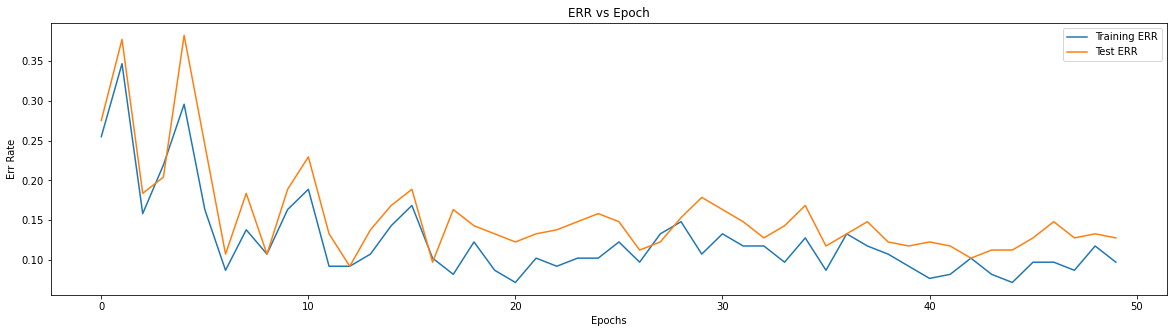

In [19]:
#Plotting Change in Test and Training ERR for change in Epoch  
x = np.arange(0,epoch,1)
plt.figure(figsize=(20,5))
plt.plot(x,err_mat[:,1])
plt.plot(x,err_mat[:,2])
plt.title("ERR vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Err Rate")
plt.legend(['Training ERR', 'Test ERR'])   

Text(0, 0.5, 'Loss')

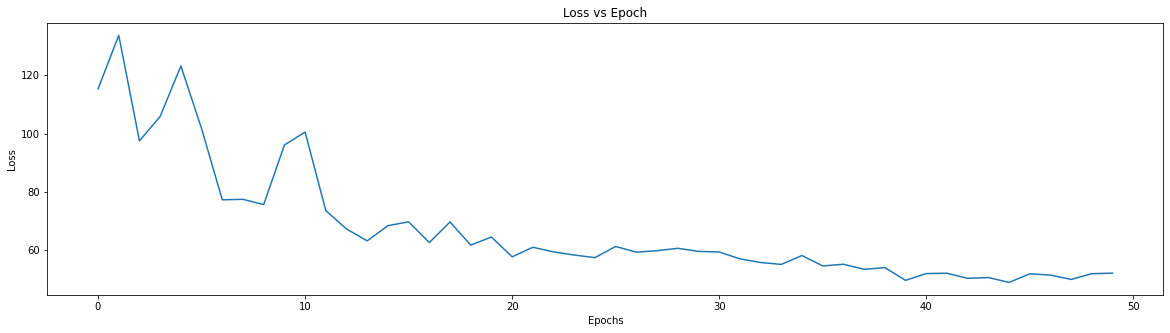

In [20]:
#Plotting Change in Loss for change in Epoch  
x = np.arange(0,epoch,1)
plt.figure(figsize=(20,5))
plt.plot(x,err_mat[:,0])
plt.title("Loss vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Analysis of change in ERR due to change in Learning Rate for fixed Epoch

Initial weights: [-0.15001295  0.38929864  0.18841302  0.11414463 -0.26358791 -0.46112229]
Final Weights: [-1.49265134 -3.06909057 -3.36012517  1.56632272  0.23224767 -0.03648901]
Epoch: 100 LR: 0.1 Loss: 34.68493248946904  Training ER: 0.08673469387755102  Test ER: 0.11734693877551021

Initial weights: [ 0.54323711 -0.32649482 -0.09427666 -0.69017869 -0.04221157 -0.10328015]
Final Weights: [-1.22759062 -2.60933697 -3.07073245  1.42183207  0.13741273 -0.03355111]
Epoch: 100 LR: 0.01 Loss: 34.91250018400962  Training ER: 0.09183673469387756  Test ER: 0.11734693877551021

Initial weights: [-0.45626764  0.69997144 -0.21154705  0.56710763 -0.16643648  0.25046009]
Final Weights: [-0.33558733 -0.91765274 -1.92930913  0.90492721  0.1096499   0.41232678]
Epoch: 100 LR: 0.001 Loss: 43.109280964463686  Training ER: 0.08673469387755102  Test ER: 0.12755102040816327

Initial weights: [-0.50248985  0.48514264 -0.05232669  0.08943954  0.60055214 -0.01405555]
Final Weights: [-0.33167731 -0.08388066 -

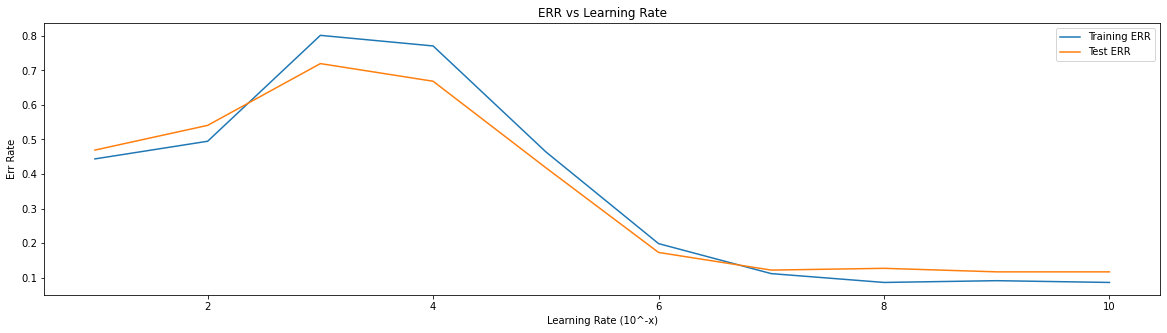

In [21]:
epoch = 100
err_mat = np.zeros([10,3])
for i in np.arange(1, 11 ):
    lr = 1/(10**i)
    result = logistic_regression(X_train,y_train,epoch,lr)
    train_err = error_rate(X_train,y_train,result[0])
    test_err = error_rate(X_test,y_test,result[0])
    err_mat[i-1][0] = result[1]
    err_mat[i-1][1] = train_err
    err_mat[i-1][2] = test_err
    print("Epoch: 100","LR:", lr ,"Loss:",result[1]," Training ER:",err_mat[i-1][1]," Test ER:",err_mat[i-1][2])
    print("")

#Plotting change in test and training ERR for change in Learning rate  
x = np.arange(10,0,-1)
plt.figure(figsize=(20,5))
plt.plot(x,err_mat[:,1])
plt.plot(x,err_mat[:,2])
plt.title("ERR vs Learning Rate")
plt.xlabel("Learning Rate (10^-x)")
plt.ylabel("Err Rate")
plt.legend(['Training ERR', 'Test ERR'])

# Implementing Logistic regression with  Stopping Criteria of Change in Training ERR

In [22]:
#Stopping Criteria of Change in Training ERR is less than 10% over last n iterations
def logistic_regression_stop_err(X_train,y_train,epoch,lr,X_test,y_test):
    train_err = np.zeros(epoch)
    test_err = np.zeros(epoch)
    loss = np.zeros(epoch)
    d=np.shape(X_test)[1]
    lmbda = np.random.uniform(-0.7,0.7,d+1)
    #Uncomment below line and include weights of choice and comment above two lines to stop random generation
    #lmbda = np.array([ 0.15186064,  0.19682533, -0.63552302, -0.20966892,  0.00612083,  0.53645851])
    for i in range(epoch):
        train_z = func(X_train,lmbda)
        train_sig = sigmoid(train_z)
        train_pred = np.where(train_sig >= 0.5,1,0)
        train_err[i] = np.mean(train_pred != y_train)
        #Calculating change in training ERR over last 10 iterations
        if i> 50:
            change = (train_err[i-50]-train_err[i])
            if change < 0.1:
                print("Stopping Iteration:",i)
                return lmbda,loss,train_err,test_err,i
            else:
                test_z = func(X_test,lmbda)
                test_sig = sigmoid(test_z)
                test_pred = np.where(test_sig > 0.5,1,0)
                test_err[i] = np.mean(test_pred != y_test)
                loss[i] = loss_func(y_train,train_sig)
                gd = gradient_descent(X_train,y_train,train_sig,lmbda)
                lmbda = lmbda - lr*gd
        else:
            test_z = func(X_test,lmbda)
            test_sig = sigmoid(test_z)
            test_pred = np.where(test_sig > 0.5,1,0)
            test_err[i] = np.mean(test_pred != y_test)
            loss[i] = loss_func(y_train,train_sig)
            gd = gradient_descent(X_train,y_train,train_sig,lmbda)
            lmbda = lmbda - lr*gd
    print("Stopping Iteration:",i)        
    return lmbda,loss,train_err,test_err,i

In [23]:
#Running the logistic regression with stopping criteria
epoch =1000
lr = 10**-4
results = logistic_regression_stop_err(X_train,y_train,epoch,lr,X_test,y_test)
last_iter = results[4]
train_err_end = error_rate(X_train,y_train,results[0])
test_err_end = error_rate(X_test,y_test,results[0])
print("LR:",lr,"Epoch:",epoch,"Training ERR:",train_err_end,"Test ERR:",test_err_end)

Stopping Iteration: 119
LR: 0.0001 Epoch: 1000 Training ERR: 0.10714285714285714 Test ERR: 0.14795918367346939


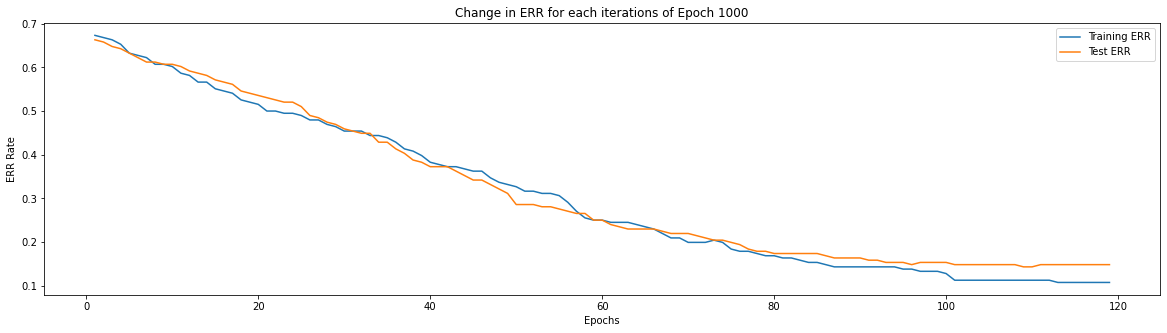

In [24]:
#Plotting change in ERR for each iteration
x = np.arange(1,last_iter+1)
plt.figure(figsize=(20,5))
plt.plot(x,results[2][:last_iter])
plt.plot(x,results[3][:last_iter])
plt.title("Change in ERR for each iterations of Epoch %d" %epoch)
plt.xlabel("Epochs")
plt.ylabel("ERR Rate")
plt.legend(['Training ERR', 'Test ERR'])

Text(0, 0.5, 'Loss')

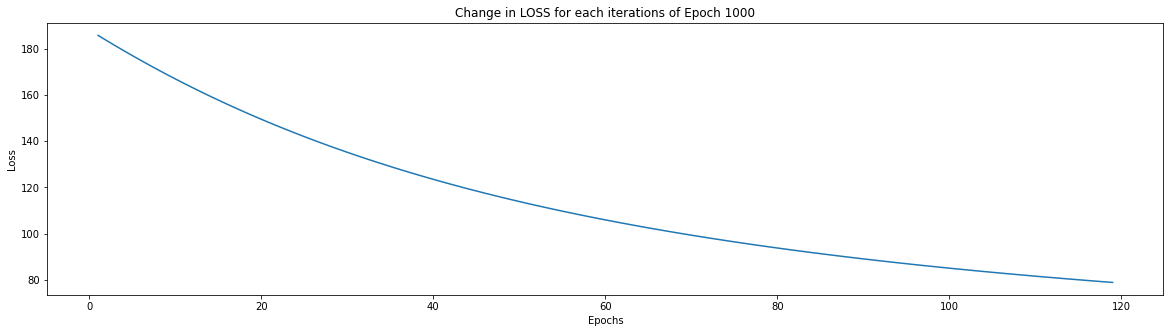

In [25]:
#Plotting change in Loss for each iteration
x = np.arange(1,last_iter+1)
plt.figure(figsize=(20,5))
plt.plot(x,results[1][:last_iter])
plt.title("Change in LOSS for each iterations of Epoch %d" %epoch)
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Logistic Regression with Stopping Criteria of Change in Loss 

In [26]:
#Stopping Criteria of Change in Loss is less than 10% over last n iterations
def logistic_regression_stop_loss(X_train,y_train,epoch,lr,X_test,y_test):
    train_err = np.zeros(epoch)
    test_err = np.zeros(epoch)
    loss = np.zeros(epoch)
    lmbda = np.array([ 0.15186064,  0.19682533, -0.63552302, -0.20966892,  0.00612083,  0.53645851])
    for i in range(epoch):
        train_z = func(X_train,lmbda)
        train_sig = sigmoid(train_z)
        train_pred = np.where(train_sig >= 0.5,1,0)
        train_err[i] = np.mean(train_pred != y_train)
        loss[i] = loss_func(y_train,train_sig)
        #Calculating change in loss over last n iterations
        if i> 100:
            change = (loss[i-100]-loss[i])/loss[i-100]
            if change < 0.1:
                print("Stopping Iteration:",i)
                return lmbda,loss,train_err,test_err,i
            else:
                test_z = func(X_test,lmbda)
                test_sig = sigmoid(test_z)
                test_pred = np.where(test_sig > 0.5,1,0)
                test_err[i] = np.mean(test_pred != y_test)
                gd = gradient_descent(X_train,y_train,train_sig,lmbda)
                lmbda = lmbda - lr*gd
        else:
            test_z = func(X_test,lmbda)
            test_sig = sigmoid(test_z)
            test_pred = np.where(test_sig > 0.5,1,0)
            test_err[i] = np.mean(test_pred != y_test)
            gd = gradient_descent(X_train,y_train,train_sig,lmbda)
            lmbda = lmbda - lr*gd
    print("Stopping Iteration:",i)        
    return lmbda,loss,train_err,test_err,i

In [27]:
#Running the logistic regression with stopping criteria 
epoch =1000
lr = 10**-4
results = logistic_regression_stop_loss(X_train,y_train,epoch,lr,X_test,y_test)
last_iter = results[4]
train_err_end = error_rate(X_train,y_train,results[0])
test_err_end = error_rate(X_test,y_test,results[0])
print("LR:",lr,"Epoch:",epoch,"Training ERR:",train_err_end,"Test ERR:",test_err_end)

Stopping Iteration: 281
LR: 0.0001 Epoch: 1000 Training ERR: 0.09693877551020408 Test ERR: 0.12244897959183673


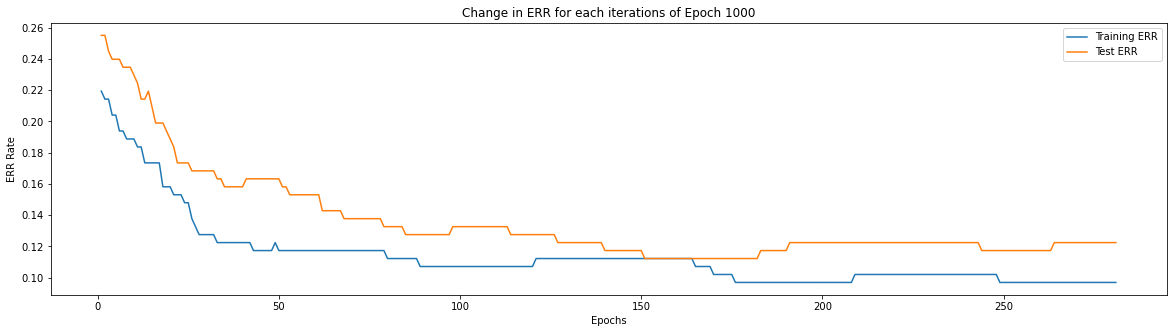

In [28]:
#Plotting the ERR with change in epoch for the logistic regression with stopping criteria
x = np.arange(1,last_iter+1)
plt.figure(figsize=(20,5))
plt.plot(x,results[2][:last_iter])
plt.plot(x,results[3][:last_iter])
plt.title("Change in ERR for each iterations of Epoch %d" %epoch)
plt.xlabel("Epochs")
plt.ylabel("ERR Rate")
plt.legend(['Training ERR', 'Test ERR'])

Text(0, 0.5, 'Loss')

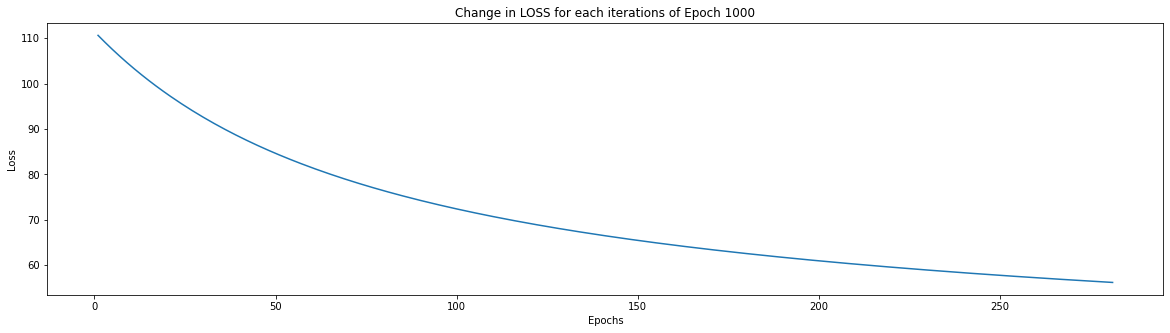

In [29]:
#Plotting the Loss with change in epoch for the logistic regression with stopping criteria
x = np.arange(1,last_iter+1)
plt.figure(figsize=(20,5))
plt.plot(x,results[1][:last_iter])
plt.title("Change in LOSS for each iterations of Epoch 1000")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Task 6 : 100 runs with stopping criteria of change in Training ERR is less than 10% over last 50 iterations

Stopping Iteration: 60
Stopping Iteration: 99
Stopping Iteration: 99
Stopping Iteration: 99
Stopping Iteration: 55
Stopping Iteration: 99
Stopping Iteration: 86
Stopping Iteration: 51
Stopping Iteration: 64
Stopping Iteration: 51
Stopping Iteration: 99
Stopping Iteration: 89
Stopping Iteration: 99
Stopping Iteration: 99
Stopping Iteration: 51
Stopping Iteration: 99
Stopping Iteration: 77
Stopping Iteration: 99
Stopping Iteration: 53
Stopping Iteration: 99
Stopping Iteration: 99
Stopping Iteration: 51
Stopping Iteration: 99
Stopping Iteration: 91
Stopping Iteration: 99
Stopping Iteration: 99
Stopping Iteration: 99
Stopping Iteration: 99
Stopping Iteration: 51
Stopping Iteration: 78
Stopping Iteration: 99
Stopping Iteration: 99
Stopping Iteration: 99
Stopping Iteration: 99
Stopping Iteration: 60
Stopping Iteration: 61
Stopping Iteration: 64
Stopping Iteration: 99
Stopping Iteration: 78
Stopping Iteration: 80
Stopping Iteration: 99
Stopping Iteration: 99
Stopping Iteration: 99
Stopping It

{'whiskers': [<matplotlib.lines.Line2D at 0x1b25b56c190>,
 'caps': [<matplotlib.lines.Line2D at 0x1b25b56c850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b25b55cdf0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b25b56cf10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b25ace82b0>],
 'means': []}

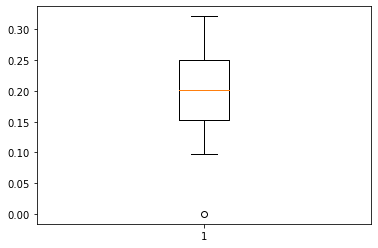

In [30]:
epoch =100
lr = 10**-4
test_err = np.zeros(100)
for i in np.arange(1, 100 ):
    results = logistic_regression_stop_err(X_train,y_train,epoch,lr,X_test,y_test)
    test_err[i] = error_rate(X_test,y_test,results[0])
plt.boxplot(test_err)    

# Task 7

In [31]:
#Function for Logistic Regression with initial weights as parameters
def logistic_regression_pass_weights(X_train,y_train,lmbda,epoch,lr):
    for i in range(epoch):
        z = func(X_train,lmbda)
        sig = sigmoid(z)
        loss = loss_func(y_train,sig)
        gd = gradient_descent(X_train,y_train,sig,lmbda)
        lmbda = lmbda - lr*gd
    #print("Final Weights:",lmbda)
    return lmbda
    

In [32]:
for i in range(4):
    print("Training ",i+1)
    print("***********************************************")
    d=np.shape(X_train)[1]
    lmbda = np.random.uniform(-0.7,0.7,d+1)
    print("Initial Weights:",lmbda)
    print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
    for j in np.arange(1, 11 ):
        lr = 1/(10**j)
        for k in [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000 ] :
            result1 = logistic_regression_pass_weights(X_train,y_train,lmbda,k,lr)
            train_err = error_rate(X_train,y_train,result1)
            print("LR:", lr ," Epoch:",k," Training ER:",train_err)
            print("")
        print("--------------------------------------------------------")    
        

Training  1
***********************************************
Initial Weights: [ 0.39629424 -0.05441637 -0.30488662  0.26954189 -0.48096309  0.3978001 ]
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
LR: 0.1  Epoch: 10  Training ER: 0.08163265306122448

LR: 0.1  Epoch: 20  Training ER: 0.08673469387755102

LR: 0.1  Epoch: 50  Training ER: 0.08673469387755102

LR: 0.1  Epoch: 100  Training ER: 0.08673469387755102

LR: 0.1  Epoch: 200  Training ER: 0.08673469387755102

LR: 0.1  Epoch: 500  Training ER: 0.08673469387755102

LR: 0.1  Epoch: 1000  Training ER: 0.08673469387755102

LR: 0.1  Epoch: 2000  Training ER: 0.08673469387755102

LR: 0.1  Epoch: 5000  Training ER: 0.08673469387755102

LR: 0.1  Epoch: 10000  Training ER: 0.08673469387755102

--------------------------------------------------------
LR: 0.01  Epoch: 10  Training ER: 0.08163265306122448

LR: 0.01  Epoch: 20  Training ER: 0.08163265306122448

LR: 0.01  Epoch: 50  Training ER: 0.08673469387755102

LR: 0.01  Epoch: 100  Tra

LR: 0.001  Epoch: 500  Training ER: 0.09693877551020408

LR: 0.001  Epoch: 1000  Training ER: 0.09183673469387756

LR: 0.001  Epoch: 2000  Training ER: 0.08673469387755102

LR: 0.001  Epoch: 5000  Training ER: 0.08673469387755102

LR: 0.001  Epoch: 10000  Training ER: 0.08673469387755102

--------------------------------------------------------
LR: 0.0001  Epoch: 10  Training ER: 0.41836734693877553

LR: 0.0001  Epoch: 20  Training ER: 0.37244897959183676

LR: 0.0001  Epoch: 50  Training ER: 0.24489795918367346

LR: 0.0001  Epoch: 100  Training ER: 0.16326530612244897

LR: 0.0001  Epoch: 200  Training ER: 0.1377551020408163

LR: 0.0001  Epoch: 500  Training ER: 0.10204081632653061

LR: 0.0001  Epoch: 1000  Training ER: 0.07142857142857142

LR: 0.0001  Epoch: 2000  Training ER: 0.08163265306122448

LR: 0.0001  Epoch: 5000  Training ER: 0.09693877551020408

LR: 0.0001  Epoch: 10000  Training ER: 0.09183673469387756

--------------------------------------------------------
LR: 1e-05  Epoc

LR: 1e-06  Epoch: 500  Training ER: 0.5255102040816326

LR: 1e-06  Epoch: 1000  Training ER: 0.5153061224489796

LR: 1e-06  Epoch: 2000  Training ER: 0.4744897959183674

LR: 1e-06  Epoch: 5000  Training ER: 0.39285714285714285

LR: 1e-06  Epoch: 10000  Training ER: 0.19387755102040816

--------------------------------------------------------
LR: 1e-07  Epoch: 10  Training ER: 0.5561224489795918

LR: 1e-07  Epoch: 20  Training ER: 0.5561224489795918

LR: 1e-07  Epoch: 50  Training ER: 0.5561224489795918

LR: 1e-07  Epoch: 100  Training ER: 0.5561224489795918

LR: 1e-07  Epoch: 200  Training ER: 0.5561224489795918

LR: 1e-07  Epoch: 500  Training ER: 0.5561224489795918

LR: 1e-07  Epoch: 1000  Training ER: 0.5561224489795918

LR: 1e-07  Epoch: 2000  Training ER: 0.5459183673469388

LR: 1e-07  Epoch: 5000  Training ER: 0.5255102040816326

LR: 1e-07  Epoch: 10000  Training ER: 0.5153061224489796

--------------------------------------------------------
LR: 1e-08  Epoch: 10  Training ER: 0.

LR: 1e-09  Epoch: 500  Training ER: 0.8367346938775511

LR: 1e-09  Epoch: 1000  Training ER: 0.8367346938775511

LR: 1e-09  Epoch: 2000  Training ER: 0.8367346938775511

LR: 1e-09  Epoch: 5000  Training ER: 0.8367346938775511

LR: 1e-09  Epoch: 10000  Training ER: 0.8367346938775511

--------------------------------------------------------
LR: 7.091869599285993e-10  Epoch: 10  Training ER: 0.8367346938775511

LR: 7.091869599285993e-10  Epoch: 20  Training ER: 0.8367346938775511

LR: 7.091869599285993e-10  Epoch: 50  Training ER: 0.8367346938775511

LR: 7.091869599285993e-10  Epoch: 100  Training ER: 0.8367346938775511

LR: 7.091869599285993e-10  Epoch: 200  Training ER: 0.8367346938775511

LR: 7.091869599285993e-10  Epoch: 500  Training ER: 0.8367346938775511

LR: 7.091869599285993e-10  Epoch: 1000  Training ER: 0.8367346938775511

LR: 7.091869599285993e-10  Epoch: 2000  Training ER: 0.8367346938775511

LR: 7.091869599285993e-10  Epoch: 5000  Training ER: 0.8367346938775511

LR: 7.0918

In [33]:
#Function for Logistic Regression with fixed lambda
def logistic_regression_pass_weights(X_train,y_train,lmbda,epoch,lr):
    #d=np.shape(X_train)[1]
    #lmbda = np.random.uniform(-0.7,0.7,d+1)
    print("Initial weights:",lmbda)
    for i in range(epoch):
        z = func(X_train,lmbda)
        sig = sigmoid(z)
        loss = loss_func(y_train,sig)
        gd = gradient_descent(X_train,y_train,sig,lmbda)
        lmbda = lmbda - lr*gd
    print("Final Weights:",lmbda)
    return lmbda
lmbda1 = np.array([0.58622681,  0.67896736, -0.20967719,  0.54625558,  0.41760891,  0.19273616])
best1 = logistic_regression_pass_weights(X_train,y_train,lmbda1,20,0.1,)
train_err1 = error_rate(X_train,y_train,best1)
print("LR: 0.1 Epoch:20 Training ER:",train_err1)  

print("")
lmbda2 = np.array([-0.5448926,  -0.11572286,  0.09446524,  0.20496119,  0.07465576, -0.54911738])
best2 = logistic_regression_pass_weights(X_train,y_train,lmbda2,20,0.1,)
train_err2 = error_rate(X_train,y_train,best2)
print("LR: 0.1 Epoch:20 Training ER:",train_err2)

Initial weights: [ 0.58622681  0.67896736 -0.20967719  0.54625558  0.41760891  0.19273616]
Final Weights: [-2.58287415 -4.90850713 -4.67168813  2.19838117  0.58670304  0.14237691]
LR: 0.1 Epoch:20 Training ER: 0.08163265306122448

Initial weights: [-0.5448926  -0.11572286  0.09446524  0.20496119  0.07465576 -0.54911738]
Final Weights: [-2.2461991  -4.36785587 -4.24890478  1.99902598  0.43093797  0.10026473]
LR: 0.1 Epoch:20 Training ER: 0.08673469387755102
